In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df_path = "./services_dataset.csv"

In [2]:
df = pd.read_csv(df_path)

/home/david/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Service customizations

In this notebook we present some visualizations to give an idea on which customizations are most common accross services and how these impact the price.


We start by counting the number of services that contain each of the studied keywords.
(Bundle is not a keyword, it represent if the services presents more a package of several services i.e youtube view + like + comment)

In [39]:
ps = df.groupby(['Site', 'Product'])['ID'].count().reset_index(name='Nservices').sort_values(by='Nservices', ascending=False)


 ## Popular services 
 We rank the top 10 popular services by the number of its different variations identified across all panels during 4 months.

In [40]:
ps[:20]

,Site,Product,Nservices
265,YouTube,view,6123
89,Instagram,like,6083
248,Website,traffic,5143
86,Instagram,follower,5129
104,Instagram,view,1981
177,Spotify,play,1495
42,Facebook,like,1477
85,Instagram,comment,1393
261,YouTube,share,1070
256,YouTube,like,882


# Keywords presence

The tables below represent the appearence of the kewyords in eacho of the top 20 services.
They are presented as total number of appearences in the first table and as a percentage.

Another 2 analogous tables are presented with bundles and geolocated service filtered out.
The reason for this is that in price analysis we will likely use this filter as these variables heavly influence the price and may make the distinctions due to other words unnoticeable.

In [5]:

def keyword_presence(services, filter=False):
    keywords = df.columns[4: -10]
    if filter:
        keywords= keywords[:-1]
        df_l = [df.loc[(df.Site==service[0]) & (df.Product==service[1]) & ~(df.Bundle) & (df.Geo == "Unspecified")][keywords] for service in services]
    else:
        df_l = [df.loc[(df.Site==service[0]) & (df.Product==service[1])][keywords] for service in services]
        
    lens = [len(d) for d in df_l]
    df_abs = pd.concat([  d.sum() for d in df_l], axis=1)
    df_abs.columns = [' '.join(s) for s in services]
    df_abs.loc['Total'] = lens
    df_abs['Total'] = df_abs.sum(axis=1)
    
    
#     df_ret.columns = df_ret.columns[::2].to_list() + df_ret.columns[1::2].to_list()
    return df_abs

top10 = ps[['Site', 'Product']][:20].values.tolist()
        
total_kp = keyword_presence(top10)
total_kp_filtered = keyword_presence(top10, filter=True)
per_kp = (100. * total_kp / total_kp.loc['Total']).round(1).T
per_kp_filtered = (100. * total_kp_filtered / total_kp_filtered.loc['Total']).round(1).T

In [6]:
total_kp.T.iloc[:, :20]

,Active,Real,Bot,No Drip,Drip,No Drop,Drop,Random,Custom,No Refill,Refill,Female,Male,Power,HQ,LQ,No Guarantee,Guarantee,Refund,No refund
YouTube view,625,1709,6,0,47,1054,1081,969,24,1120,2379,0,0,0,114,3,1,2876,380,294
Instagram like,174,2016,264,0,163,311,977,59,14,1007,509,38,26,270,722,104,40,585,46,492
Website traffic,0,3551,0,0,81,60,48,7,357,48,144,0,0,0,53,0,0,812,2,48
Instagram follower,376,2254,292,0,72,238,1371,83,5,1127,1958,68,44,9,915,62,74,776,56,372
Instagram view,6,642,0,0,86,130,136,83,1,188,162,0,0,0,125,0,1,167,32,67
Spotify play,0,110,49,0,230,252,171,1,56,20,554,0,0,0,238,9,0,524,57,16
Facebook like,32,661,9,0,33,106,294,51,1,314,533,6,4,0,148,67,8,358,53,94
Instagram comment,37,203,15,0,18,30,79,667,546,307,66,110,79,17,189,1,0,136,0,233
YouTube share,0,60,333,0,100,122,53,1,0,2,506,0,0,0,41,0,0,444,0,1
YouTube like,19,250,1,0,34,38,233,10,8,201,362,0,0,0,113,1,10,192,13,95


In [7]:
total_kp.T.iloc[:, 20:]

,Slow,Fast,Instant,Day,Hour,Bundle,Total
YouTube view,145,442,2612,4261,1458,2003,6123
Instagram like,309,1232,2964,1689,1881,927,6083
Website traffic,0,44,1006,4507,1863,947,5143
Instagram follower,197,575,1600,3108,1578,730,5129
Instagram view,55,412,1313,873,399,842,1981
Spotify play,74,181,359,1076,802,103,1495
Facebook like,49,169,655,865,687,121,1477
Instagram comment,19,258,478,395,452,70,1393
YouTube share,4,28,114,810,231,183,1070
YouTube like,25,187,367,591,262,114,882


In [8]:
per_kp.iloc[:, :20]

,Active,Real,Bot,No Drip,Drip,No Drop,Drop,Random,Custom,No Refill,Refill,Female,Male,Power,HQ,LQ,No Guarantee,Guarantee,Refund,No refund
YouTube view,10.2,27.9,0.1,0.0,0.8,17.2,17.7,15.8,0.4,18.3,38.9,0.0,0.0,0.0,1.9,0.0,0.0,47.0,6.2,4.8
Instagram like,2.9,33.1,4.3,0.0,2.7,5.1,16.1,1.0,0.2,16.6,8.4,0.6,0.4,4.4,11.9,1.7,0.7,9.6,0.8,8.1
Website traffic,0.0,69.0,0.0,0.0,1.6,1.2,0.9,0.1,6.9,0.9,2.8,0.0,0.0,0.0,1.0,0.0,0.0,15.8,0.0,0.9
Instagram follower,7.3,43.9,5.7,0.0,1.4,4.6,26.7,1.6,0.1,22.0,38.2,1.3,0.9,0.2,17.8,1.2,1.4,15.1,1.1,7.3
Instagram view,0.3,32.4,0.0,0.0,4.3,6.6,6.9,4.2,0.1,9.5,8.2,0.0,0.0,0.0,6.3,0.0,0.1,8.4,1.6,3.4
Spotify play,0.0,7.4,3.3,0.0,15.4,16.9,11.4,0.1,3.7,1.3,37.1,0.0,0.0,0.0,15.9,0.6,0.0,35.1,3.8,1.1
Facebook like,2.2,44.8,0.6,0.0,2.2,7.2,19.9,3.5,0.1,21.3,36.1,0.4,0.3,0.0,10.0,4.5,0.5,24.2,3.6,6.4
Instagram comment,2.7,14.6,1.1,0.0,1.3,2.2,5.7,47.9,39.2,22.0,4.7,7.9,5.7,1.2,13.6,0.1,0.0,9.8,0.0,16.7
YouTube share,0.0,5.6,31.1,0.0,9.3,11.4,5.0,0.1,0.0,0.2,47.3,0.0,0.0,0.0,3.8,0.0,0.0,41.5,0.0,0.1
YouTube like,2.2,28.3,0.1,0.0,3.9,4.3,26.4,1.1,0.9,22.8,41.0,0.0,0.0,0.0,12.8,0.1,1.1,21.8,1.5,10.8


In [9]:
per_kp.iloc[:, 20:]

,Slow,Fast,Instant,Day,Hour,Bundle,Total
YouTube view,2.4,7.2,42.7,69.6,23.8,32.7,100.0
Instagram like,5.1,20.3,48.7,27.8,30.9,15.2,100.0
Website traffic,0.0,0.9,19.6,87.6,36.2,18.4,100.0
Instagram follower,3.8,11.2,31.2,60.6,30.8,14.2,100.0
Instagram view,2.8,20.8,66.3,44.1,20.1,42.5,100.0
Spotify play,4.9,12.1,24.0,72.0,53.6,6.9,100.0
Facebook like,3.3,11.4,44.3,58.6,46.5,8.2,100.0
Instagram comment,1.4,18.5,34.3,28.4,32.4,5.0,100.0
YouTube share,0.4,2.6,10.7,75.7,21.6,17.1,100.0
YouTube like,2.8,21.2,41.6,67.0,29.7,12.9,100.0


In [10]:
total_kp_filtered.T.iloc[:, :20]

,Active,Real,Bot,No Drip,Drip,No Drop,Drop,Random,Custom,No Refill,Refill,Female,Male,Power,HQ,LQ,No Guarantee,Guarantee,Refund,No refund
YouTube view,139,466,4,0,28,268,459,275,10,507,731,0,0,0,52,3,1,1047,158,112
Instagram like,100,1288,173,0,113,200,742,9,14,801,346,16,10,201,491,93,38,407,34,409
Website traffic,0,784,0,0,80,0,48,1,27,48,18,0,0,0,50,0,0,136,2,48
Instagram follower,216,1357,227,0,56,191,1036,16,2,774,1462,25,10,5,553,58,50,547,35,283
Instagram view,0,172,0,0,21,24,78,3,1,73,69,0,0,0,79,0,1,98,28,22
Spotify play,0,29,28,0,109,80,56,0,42,13,262,0,0,0,168,9,0,273,51,5
Facebook like,13,405,7,0,31,46,231,40,0,252,379,3,3,0,112,67,6,280,40,82
Instagram comment,20,125,14,0,16,21,54,408,281,157,54,77,63,0,118,1,0,76,0,118
YouTube share,0,43,87,0,51,4,44,1,0,0,269,0,0,0,39,0,0,179,0,0
YouTube like,7,170,1,0,28,22,191,1,1,180,278,0,0,0,90,1,9,127,5,84


In [11]:
total_kp_filtered.T.iloc[:, 20:]

,Slow,Fast,Instant,Day,Hour,Total
YouTube view,71,126,895,1676,578,2211
Instagram like,217,954,2139,1115,1401,4236
Website traffic,0,38,347,845,364,1095
Instagram follower,112,380,1191,2252,1146,3552
Instagram view,24,164,586,410,199,957
Spotify play,6,87,126,356,326,573
Facebook like,41,143,529,622,489,1076
Instagram comment,16,153,305,201,223,812
YouTube share,4,26,92,361,139,535
YouTube like,14,170,289,463,188,686


In [12]:
per_kp_filtered.iloc[:, :20]

,Active,Real,Bot,No Drip,Drip,No Drop,Drop,Random,Custom,No Refill,Refill,Female,Male,Power,HQ,LQ,No Guarantee,Guarantee,Refund,No refund
YouTube view,6.3,21.1,0.2,0.0,1.3,12.1,20.8,12.4,0.5,22.9,33.1,0.0,0.0,0.0,2.4,0.1,0.0,47.4,7.1,5.1
Instagram like,2.4,30.4,4.1,0.0,2.7,4.7,17.5,0.2,0.3,18.9,8.2,0.4,0.2,4.7,11.6,2.2,0.9,9.6,0.8,9.7
Website traffic,0.0,71.6,0.0,0.0,7.3,0.0,4.4,0.1,2.5,4.4,1.6,0.0,0.0,0.0,4.6,0.0,0.0,12.4,0.2,4.4
Instagram follower,6.1,38.2,6.4,0.0,1.6,5.4,29.2,0.5,0.1,21.8,41.2,0.7,0.3,0.1,15.6,1.6,1.4,15.4,1.0,8.0
Instagram view,0.0,18.0,0.0,0.0,2.2,2.5,8.2,0.3,0.1,7.6,7.2,0.0,0.0,0.0,8.3,0.0,0.1,10.2,2.9,2.3
Spotify play,0.0,5.1,4.9,0.0,19.0,14.0,9.8,0.0,7.3,2.3,45.7,0.0,0.0,0.0,29.3,1.6,0.0,47.6,8.9,0.9
Facebook like,1.2,37.6,0.7,0.0,2.9,4.3,21.5,3.7,0.0,23.4,35.2,0.3,0.3,0.0,10.4,6.2,0.6,26.0,3.7,7.6
Instagram comment,2.5,15.4,1.7,0.0,2.0,2.6,6.7,50.2,34.6,19.3,6.7,9.5,7.8,0.0,14.5,0.1,0.0,9.4,0.0,14.5
YouTube share,0.0,8.0,16.3,0.0,9.5,0.7,8.2,0.2,0.0,0.0,50.3,0.0,0.0,0.0,7.3,0.0,0.0,33.5,0.0,0.0
YouTube like,1.0,24.8,0.1,0.0,4.1,3.2,27.8,0.1,0.1,26.2,40.5,0.0,0.0,0.0,13.1,0.1,1.3,18.5,0.7,12.2


In [13]:
per_kp_filtered.iloc[:, 20:]

,Slow,Fast,Instant,Day,Hour,Total
YouTube view,3.2,5.7,40.5,75.8,26.1,100.0
Instagram like,5.1,22.5,50.5,26.3,33.1,100.0
Website traffic,0.0,3.5,31.7,77.2,33.2,100.0
Instagram follower,3.2,10.7,33.5,63.4,32.3,100.0
Instagram view,2.5,17.1,61.2,42.8,20.8,100.0
Spotify play,1.0,15.2,22.0,62.1,56.9,100.0
Facebook like,3.8,13.3,49.2,57.8,45.4,100.0
Instagram comment,2.0,18.8,37.6,24.8,27.5,100.0
YouTube share,0.7,4.9,17.2,67.5,26.0,100.0
YouTube like,2.0,24.8,42.1,67.5,27.4,100.0


In [14]:
(per_kp - per_kp_filtered).iloc[:, :20]

,Active,Bot,Bundle,Custom,Day,Drip,Drop,Fast,Female,Guarantee,HQ,Hour,Instant,LQ,Male,No Drip,No Drop,No Guarantee,No Refill,No refund
YouTube view,3.9,-0.1,NaN,-0.1,-6.2,-0.5,-3.1,1.5,0.0,-0.4,-0.5,-2.3,2.2,-0.1,0.0,0.0,5.1,0.0,-4.6,-0.3
Instagram like,0.5,0.2,NaN,-0.1,1.5,0.0,-1.4,-2.2,0.2,0.0,0.3,-2.2,-1.8,-0.5,0.2,0.0,0.4,-0.2,-2.3,-1.6
Website traffic,0.0,0.0,NaN,4.4,10.4,-5.7,-3.5,-2.6,0.0,3.4,-3.6,3.0,-12.1,0.0,0.0,0.0,1.2,0.0,-3.5,-3.5
Instagram follower,1.2,-0.7,NaN,0.0,-2.8,-0.2,-2.5,0.5,0.6,-0.3,2.2,-1.5,-2.3,-0.4,0.6,0.0,-0.8,0.0,0.2,-0.7
Instagram view,0.3,0.0,NaN,0.0,1.3,2.1,-1.3,3.7,0.0,-1.8,-2.0,-0.7,5.1,0.0,0.0,0.0,4.1,0.0,1.9,1.1
Spotify play,0.0,-1.6,NaN,-3.6,9.9,-3.6,1.6,-3.1,0.0,-12.5,-13.4,-3.3,2.0,-1.0,0.0,0.0,2.9,0.0,-1.0,0.2
Facebook like,1.0,-0.1,NaN,0.1,0.8,-0.7,-1.6,-1.9,0.1,-1.8,-0.4,1.1,-4.9,-1.7,0.0,0.0,2.9,-0.1,-2.1,-1.2
Instagram comment,0.2,-0.6,NaN,4.6,3.6,-0.7,-1.0,-0.3,-1.6,0.4,-0.9,4.9,-3.3,0.0,-2.1,0.0,-0.4,0.0,2.7,2.2
YouTube share,0.0,14.8,NaN,0.0,8.2,-0.2,-3.2,-2.3,0.0,8.0,-3.5,-4.4,-6.5,0.0,0.0,0.0,10.7,0.0,0.2,0.1
YouTube like,1.2,0.0,NaN,0.8,-0.5,-0.2,-1.4,-3.6,0.0,3.3,-0.3,2.3,-0.5,0.0,0.0,0.0,1.1,-0.2,-3.4,-1.4


In [15]:
(per_kp - per_kp_filtered).iloc[:, 20:]

,Power,Random,Real,Refill,Refund,Slow,Total
YouTube view,0.0,3.4,6.8,5.8,-0.9,-0.8,0.0
Instagram like,-0.3,0.8,2.7,0.2,0.0,0.0,0.0
Website traffic,0.0,0.0,-2.6,1.2,-0.2,0.0,0.0
Instagram follower,0.1,1.1,5.7,-3.0,0.1,0.6,0.0
Instagram view,0.0,3.9,14.4,1.0,-1.3,0.3,0.0
Spotify play,0.0,0.1,2.3,-8.6,-5.1,3.9,0.0
Facebook like,0.0,-0.2,7.2,0.9,-0.1,-0.5,0.0
Instagram comment,1.2,-2.3,-0.8,-2.0,0.0,-0.6,0.0
YouTube share,0.0,-0.1,-2.4,-3.0,0.0,-0.3,0.0
YouTube like,0.0,1.0,3.5,0.5,0.8,0.8,0.0


In [16]:
per_kp.to_latex(buf='table.tex')

In [17]:
# tps['Site'][:10] + ' ' + ps['Product'][:10].to_list()
top10 = ps[['Site', 'Product']][:10].values.tolist()

# Keywords influence on the serivces' prices

The number in () in the labels represents the number of services used to generate the box.
Therefore labels with a low value should be eliminated, as they are not very reliable.

In [18]:
def set_box_color(bp, color):
    plt.setp(bp['boxes'], color=color)
    plt.setp(bp['whiskers'], color=color)
    plt.setp(bp['medians'], color=color)
    
def plot_prices(site, product, a_keywords, filter=True):
    '''
    The filter parameter removes Bundles and geo-targeted specific services,
    as they are typically much more expensive services and they make the 
    difference of other variables unapreciable.
    
    '''
    fig, ax = plt.subplots(figsize=(28,5))
    df_aux = df.loc[(df.Site==site) & (df.Product==product)]
    if filter:
        df_aux=df_aux.loc[(~df_aux.Bundle) & (df_aux.Geo=='Unspecified')]
        
    left_data = []
    left_labels = []
    cent_data = []
    cent_labels = []
    right_data = []
    right_labels = []
    
    for keywords in a_keywords:
        if len(keywords) != 2:
            print('Keywords list must have len 2')
        
        cent_data.append( df_aux.loc[df_aux[keywords[0]]]['50%'].values )
        cent_labels.append(keywords[0] + " (%d)" % len(cent_data[-1]))
        right_data.append( df_aux.loc[df_aux[keywords[1]]]['50%'].values )
        right_labels.append(keywords[1] + " (%d)" % len(right_data[-1]))
        base_key = ~df_aux[keywords[0]] & ~ df_aux[keywords[1]]
        left_data.append( df_aux.loc[base_key]['50%'].values )
        left_labels.append('Base'  + " (%d)" % len(left_data[-1]))
        

    bpl = plt.boxplot(left_data, showfliers=False, labels=left_labels, positions=np.array(range(len(a_keywords)))*2.0-0.6, sym='', widths=0.4)
    bpc = plt.boxplot(cent_data, showfliers=False, labels=cent_labels, positions=np.array(range(len(a_keywords)))*2.0, sym='', widths=0.4)
    bpr = plt.boxplot(left_data, showfliers=False, labels=right_labels, positions=np.array(range(len(a_keywords)))*2.0+0.6, sym='', widths=0.4)
    
    set_box_color(bpl, 'black')
    set_box_color(bpc, 'blue')
    set_box_color(bpr, 'red')
    
    plt.title(site + ' ' + product)
    ax.set_ylabel('Price (USD)')



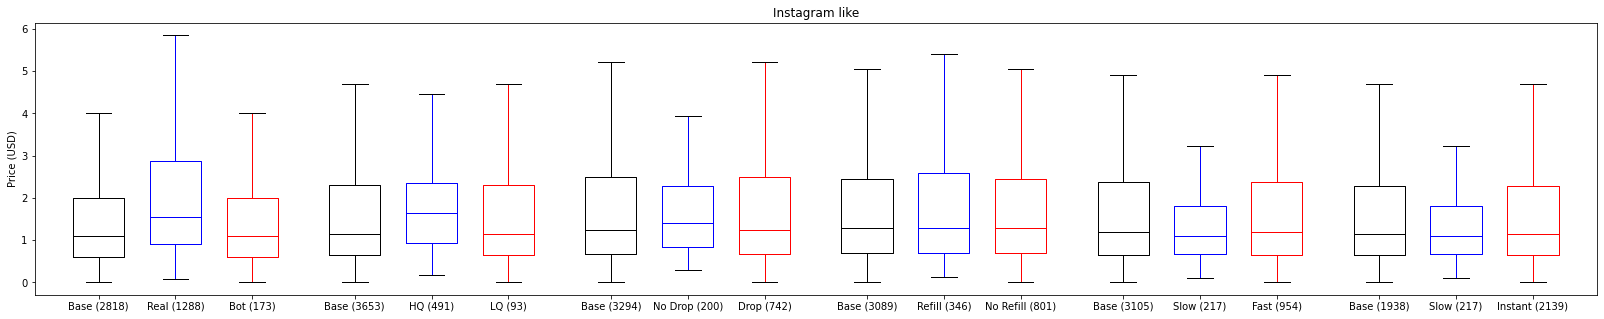

In [19]:
plot_prices('Instagram', 'like', [['Real', 'Bot'], ['HQ', 'LQ'], ['No Drop', 'Drop'],  ['Refill', 'No Refill'], ['Slow', 'Fast'], ['Slow', 'Instant']], filter=True) 

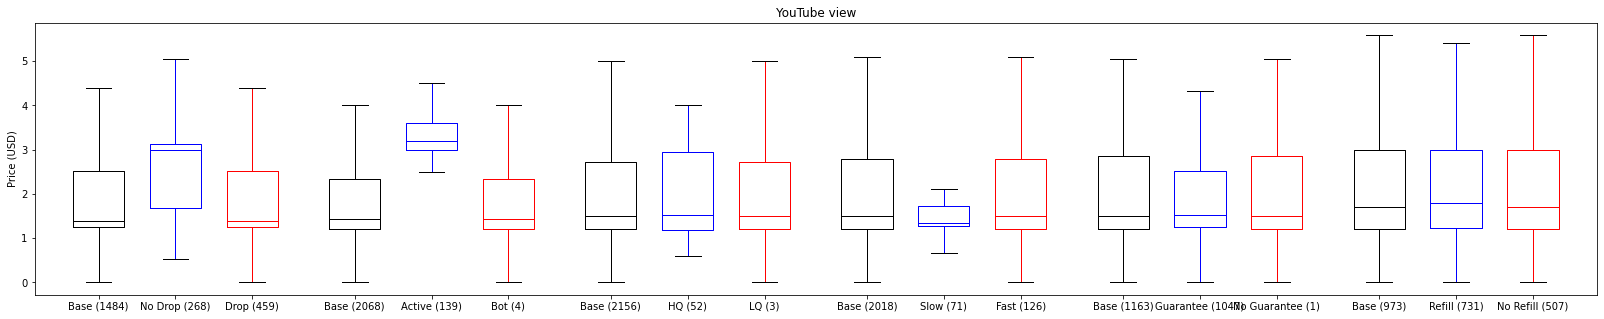

In [20]:
plot_prices('YouTube', 'view', [['No Drop', 'Drop'], ['Active', 'Bot'], ['HQ', 'LQ'], ['Slow', 'Fast'], ['Guarantee', 'No Guarantee'], ['Refill', 'No Refill']], filter=True) 

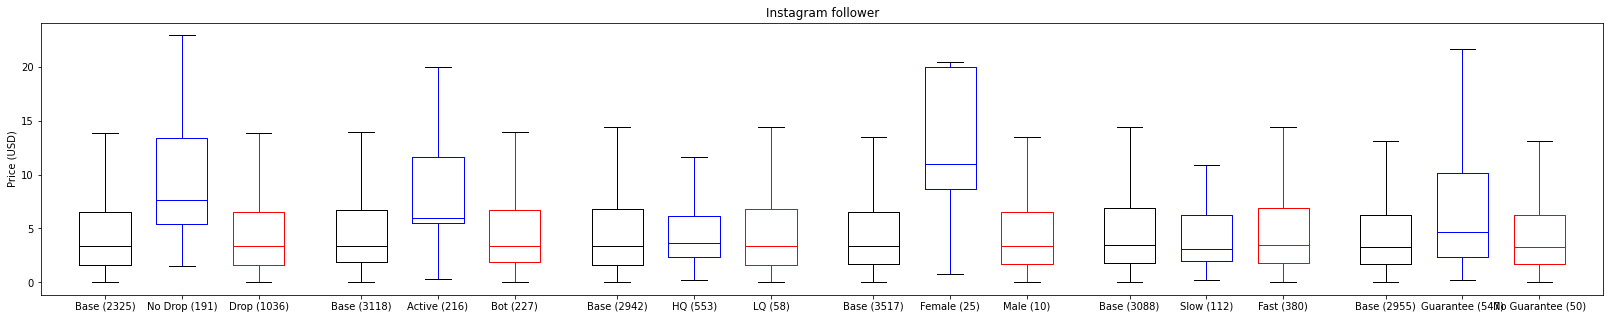

In [21]:
plot_prices('Instagram', 'follower', [['No Drop', 'Drop'], ['Active', 'Bot'], ['HQ', 'LQ'], ['Female', 'Male'], ['Slow', 'Fast'], ['Guarantee', 'No Guarantee']], filter=True) 

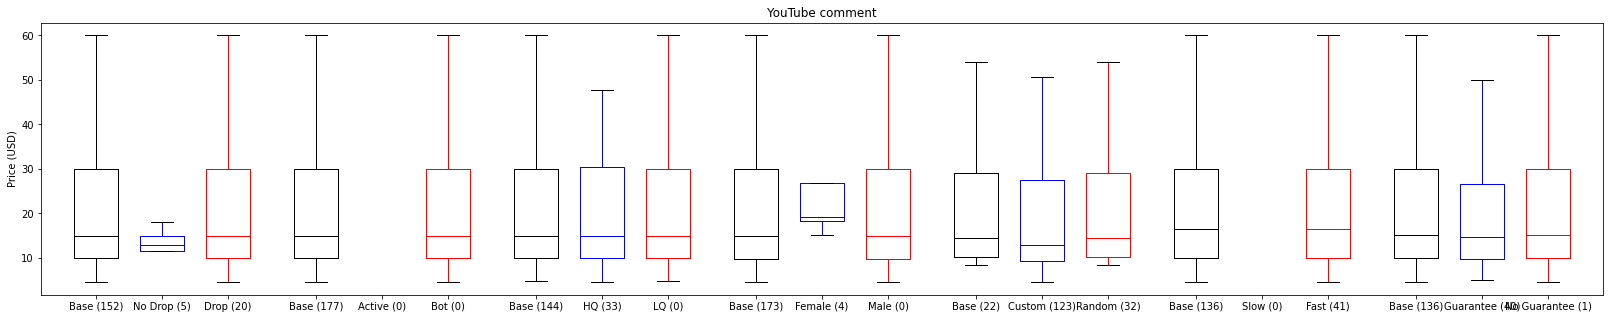

In [22]:
plot_prices('YouTube', 'comment', [['No Drop', 'Drop'], ['Active', 'Bot'], ['HQ', 'LQ'], ['Female', 'Male'], ['Custom', 'Random'], ['Slow', 'Fast'], ['Guarantee', 'No Guarantee']], filter=True) 

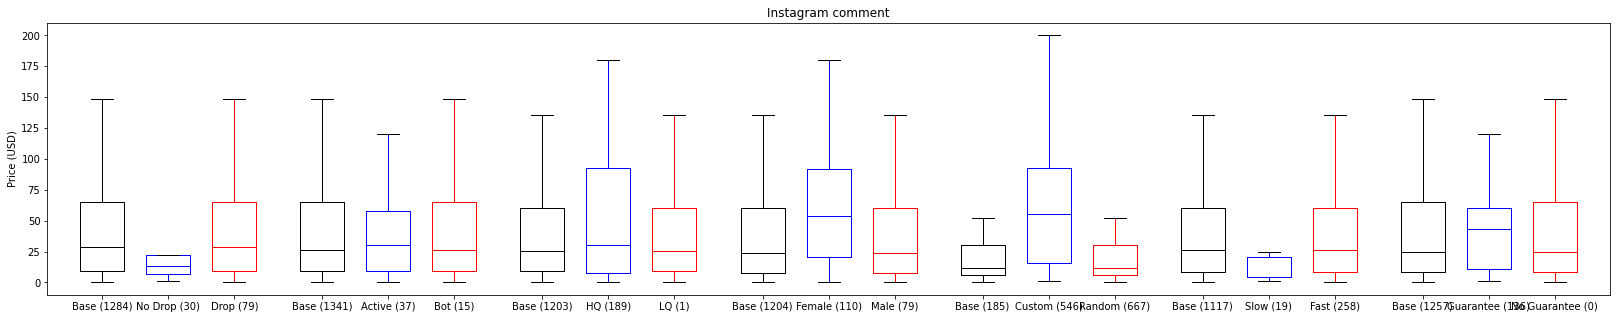

In [23]:
plot_prices('Instagram', 'comment', [['No Drop', 'Drop'], ['Active', 'Bot'], ['HQ', 'LQ'], ['Female', 'Male'], ['Custom', 'Random'], ['Slow', 'Fast'], ['Guarantee', 'No Guarantee']], filter=False) 

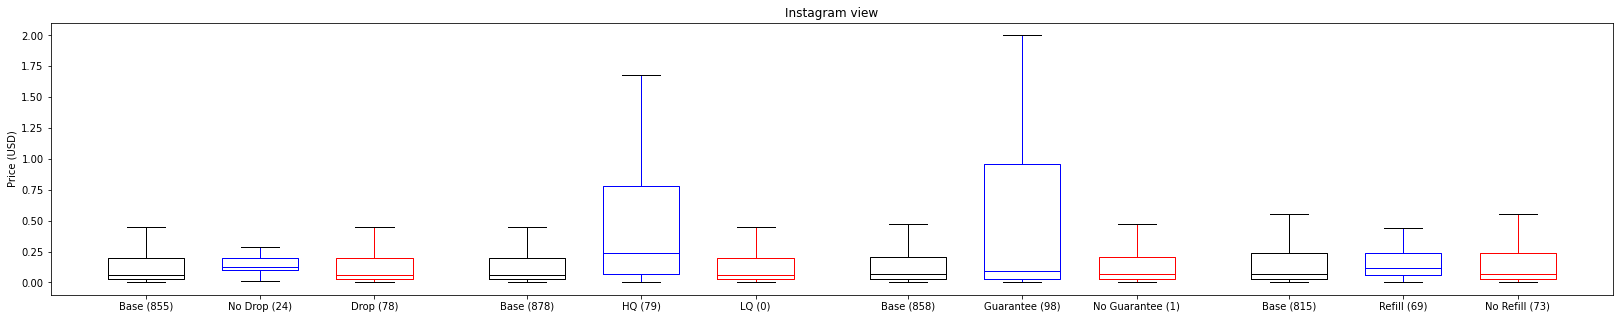

In [24]:
# plot_prices('Instagram', 'view', [['No Drop', 'Drop'], ['HQ', 'LQ'], ['Guarantee', 'No Guarantee'], ['Refill', 'No Refill'], ['Refund', 'No refund']], filter=True)
# The median for services with refund is around 7$ so the scale grows too much and the other variables cannot be apreciated
plot_prices('Instagram', 'view', [['No Drop', 'Drop'], ['HQ', 'LQ'], ['Guarantee', 'No Guarantee'], ['Refill', 'No Refill']], filter=True)


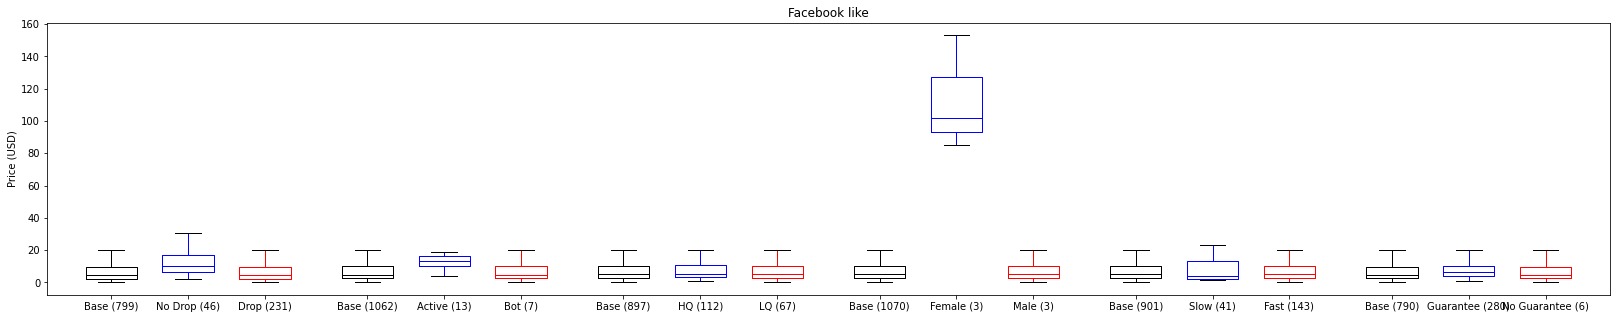

In [25]:
plot_prices('Facebook', 'like', [['No Drop', 'Drop'], ['Active', 'Bot'], ['HQ', 'LQ'], ['Female', 'Male'], ['Slow', 'Fast'], ['Guarantee', 'No Guarantee']], filter=True) 

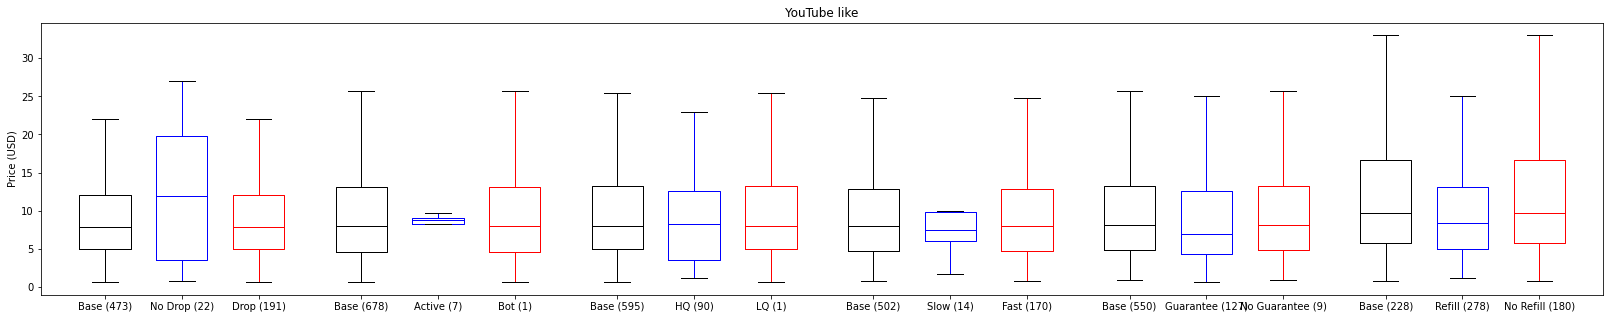

In [26]:
plot_prices('YouTube', 'like', [['No Drop', 'Drop'], ['Active', 'Bot'], ['HQ', 'LQ'], ['Slow', 'Fast'], ['Guarantee', 'No Guarantee'], ['Refill', 'No Refill']], filter=True)

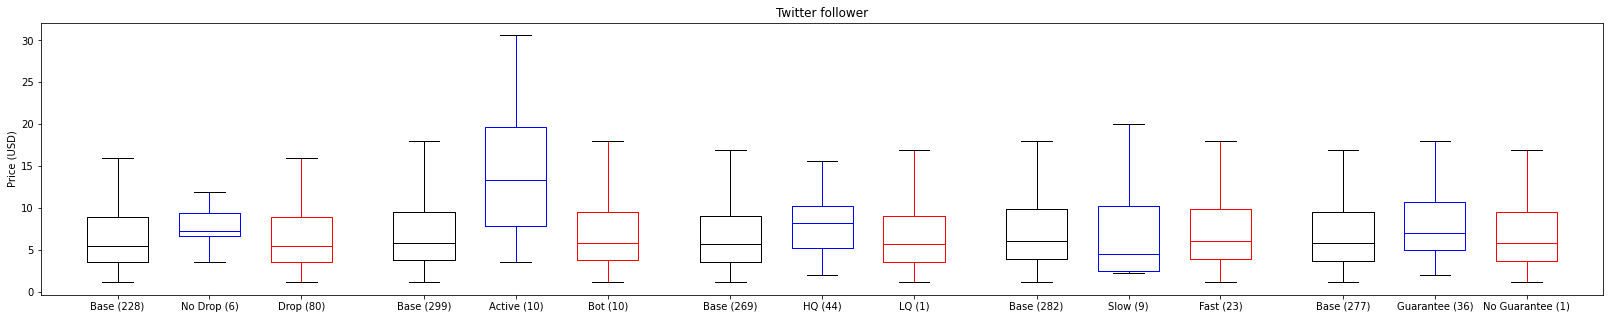

In [27]:
plot_prices('Twitter', 'follower', [['No Drop', 'Drop'], ['Active', 'Bot'], ['HQ', 'LQ'], ['Slow', 'Fast'], ['Guarantee', 'No Guarantee']], filter=True) 

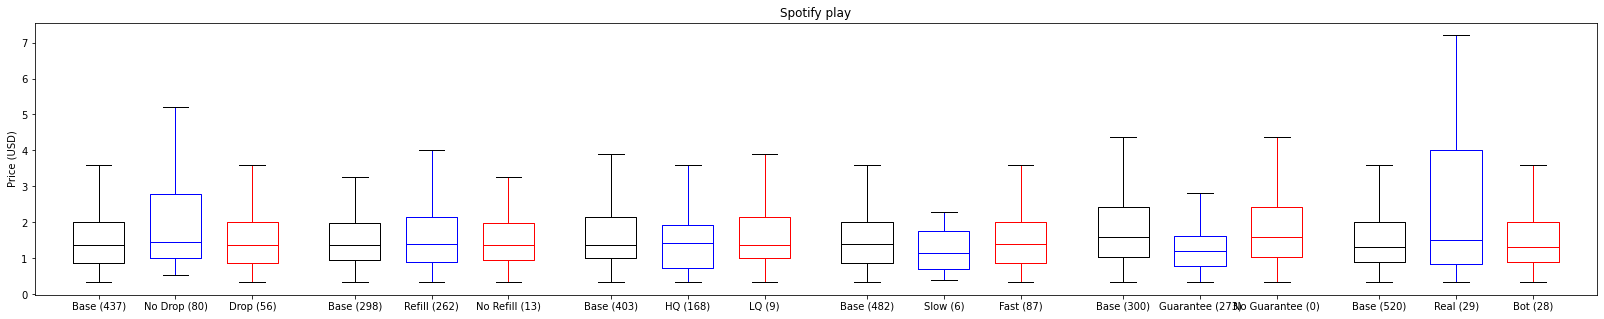

In [28]:
plot_prices('Spotify', 'play', [['No Drop', 'Drop'],['Refill', 'No Refill'], ['HQ', 'LQ'], ['Slow', 'Fast'], ['Guarantee', 'No Guarantee'], ['Real', 'Bot']], filter=True) 

In [29]:
import numpy as np
def plot_proportions(services, key_a):
    keywords = df.columns[4: -10]
    for service in services:
        if filter:
            keywords= keywords[:-1]
            df_aux = df.loc[(df.Site==service[0]) & (df.Product==service[1]) & ~(df.Bundle) & (df.Geo == "Unspecified")][keywords]
        else:
            df_aux = df.loc[(df.Site==service[0]) & (df.Product==service[1])][keywords]

        total = len(df_aux)
        per_a = np.array([[len(df_aux.loc[df_aux[key]]) for key in key_l] for key_l in key_a])  / total
        return per_a

plot_proportions([['Instagram', 'comment']], [['Drop', 'No Drop']])
        
        
    
    

array([[0.06650246, 0.02586207]])

## Geolocation

We study the offer of targeted orgin across the services, as well as the effect on prices.

In [30]:
df = pd.read_csv(df_path)

/home/david/.local/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [31]:
geo = df.loc[df.Geo!='Unspecified'].groupby(['Site', 'Product'])['ID'].count().reset_index(name='GeoServices').sort_values(['GeoServices'], ascending=False)


In [32]:
geo_df = pd.merge(ps, geo, left_on=['Site', 'Product'], right_on=['Site', 'Product'])[:20]

geo_df['%'] = (100. * geo_df['GeoServices'] / geo_df['Nservices']).round(2)
geo_df

,Site,Product,Nservices,GeoServices,%
0,YouTube,view,6123,2728,44.55
1,Instagram,like,6083,1203,19.78
2,Website,traffic,5143,3866,75.17
3,Instagram,follower,5129,948,18.48
4,Instagram,view,1981,300,15.14
5,Spotify,play,1495,871,58.26
6,Facebook,like,1477,296,20.04
7,Instagram,comment,1393,522,37.47
8,YouTube,share,1070,412,38.50
9,YouTube,like,882,86,9.75


In [33]:
geo_df = df.loc[(df.Geo!='Unspecified') & (~df.Bundle)].groupby(['Site', 'Product', 'Geo'])['50%'].describe()

In [34]:
geo_df

count        mean         std     min     25%  \
Site    Product Geo                                                          
Amazon  traffic Poland         6.0    0.398333    0.098877    0.35    0.36   
App     install Any Country    4.0  219.150000   49.686584  162.00  186.45   
                Asia           1.0  260.000000         NaN  260.00  260.00   
                UK             1.0  516.000000         NaN  516.00  516.00   
                USA            5.0  245.200000  154.371953  144.00  161.00   
...                            ...         ...         ...     ...     ...   
YouTube visitor Russia         1.0    0.500000         NaN    0.50    0.50   
                UK             1.0    0.500000         NaN    0.50    0.50   
                USA            1.0    0.500000         NaN    0.50    0.50   
                Ukraine        1.0    0.500000         NaN    0.50    0.50   
                Vietnam        1.0    0.500000         NaN    0.50    0.50   

                                50%     75%    max  
Site    Product Geo                                 
Amazon  traffic Poland         0.36    0.36    0.6  
App     install Any Country  222.30  255.00  270.0  
                Asia         260.00  260.00  260.0  
                UK           516.00  516.00  516.0  
                USA          180.00  225.00  516.0  
...                             ...     ...    ...  
YouTube visitor Russia         0.50    0.50    0.5  
                UK             0.50    0.50    0.5  
                USA            0.50    0.50    0.5  
                Ukraine        0.50    0.50    0.5  
                Vietnam        0.50    0.50    0.5  

[664 rows x 8 columns]

In [35]:
top20 = ps[['Site', 'Product']][:20].values
for service in top20:
    pass

geo_aux = geo_df.loc[('Instagram', 'like')].sort_values(['count'], ascending=False)[:5]
geo_aux

,count,mean,std,min,25%,50%,75%,max
Geo,,,,,,,,
Brazil,252.0,13.110395,34.754380,0.06,3.9150,6.0000,7.41000,306.25
India,102.0,2.450182,6.755331,0.35,0.7500,1.0150,1.81000,49.00
Arab,86.0,6.409812,16.147566,0.30,1.3125,2.6985,3.78750,99.00
Iran,74.0,3.288976,2.763440,0.34,2.0200,2.7100,3.61000,23.50
Russia,68.0,3.234842,4.993276,0.08,0.9975,1.8170,3.25675,25.83
